In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [266]:
df=pd.read_csv('bank.csv')

In [267]:
df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Bank                 515 non-null    int64
 1   DD                   515 non-null    int64
 2   Withdrawals          515 non-null    int64
 3   Deposits             515 non-null    int64
 4   Branch Area in sqft  515 non-null    int64
 5   avg daily walkins    515 non-null    int64
dtypes: int64(6)
memory usage: 24.3 KB


In [269]:
df.describe(include='all')

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,258.000000,232.252427,150.693204,81.687379,2934.669903,598.603883
std,148.811962,66.648815,56.897777,28.596912,437.062831,83.487891
min,1.000000,120.000000,10.000000,33.000000,1200.000000,380.000000
25%,129.500000,169.500000,103.000000,58.000000,2675.000000,537.500000
50%,258.000000,237.000000,152.000000,80.000000,2960.000000,601.000000
75%,386.500000,291.000000,200.000000,105.000000,3300.000000,657.500000
max,515.000000,350.000000,247.000000,212.000000,3650.000000,838.000000


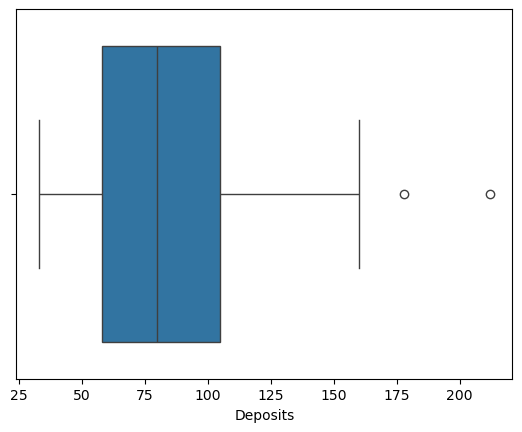

In [270]:
sns.boxplot(x='Deposits',data=df);

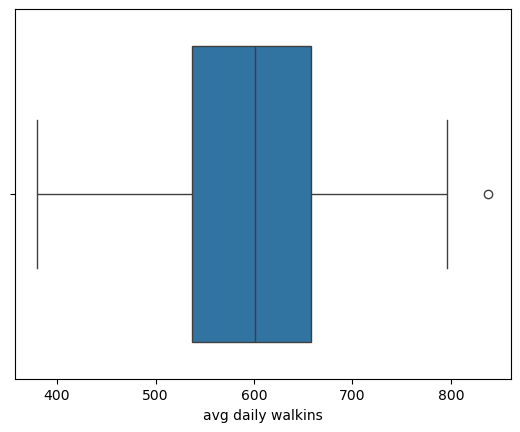

In [271]:
sns.boxplot(x='avg daily walkins',data=df);

In [272]:
# Treat the outliers using the IQR method
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [273]:
for column in df.columns:
    if df[column].dtype!='object':
        ir,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<ir,ir,df[column])

In [274]:
# scale the data using the standard scaler
from sklearn.preprocessing import StandardScaler

In [275]:
df.columns

Index(['Bank', 'DD', 'Withdrawals', 'Deposits', 'Branch Area in sqft',
       'avg daily walkins'],
      dtype='object')

In [276]:
# df.iloc{:,1:6]

In [277]:
std_scale=StandardScaler()

In [278]:
scaled_df=pd.DataFrame(std_scale.fit_transform(df.iloc[:,1:6]),columns=df.columns[1:])
scaled_df

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-0.078884,-0.064973,1.039436,-1.109135,0.484354
1,-1.640819,-1.138113,-0.587537,1.333376,-1.949581
2,1.107586,-0.029788,-0.198478,-0.853253,0.844049
3,0.281562,-0.680709,1.676078,1.659044,0.292517
4,-0.874870,-0.276082,1.640709,1.077494,-0.235036
...,...,...,...,...,...
510,1.573163,-0.188120,1.039436,-0.690419,1.143795
511,-0.964982,-0.346452,-0.764382,-0.690419,-0.894476
512,1.513088,-1.138113,0.933329,-0.201916,0.927978
513,-0.604535,0.445209,-1.683976,-0.411275,-1.122283


In [279]:
from sklearn.cluster import KMeans

In [280]:
km=KMeans(2,random_state=1)
kmeans=km.fit(scaled_df)

In [281]:
kmeans.labels_

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [282]:
kmeans.inertia_

1943.2607816399436

In [283]:
km=KMeans(3,random_state=1)
kmeans=km.fit(scaled_df)
kmeans.inertia_

1594.0747012502877

In [284]:
wcss=[]
for i in range(1,11):
    km=KMeans(i,random_state=1)
    kmeans=km.fit(scaled_df)
    wcss.append(kmeans.inertia_)

In [285]:
wcss

[2575.0,
 1943.2607816399436,
 1594.074701250288,
 1376.4504504699564,
 1256.3175851345898,
 1159.9033333879872,
 1025.0093352846234,
 973.2866853557257,
 888.0335575863303,
 861.5387341469134]

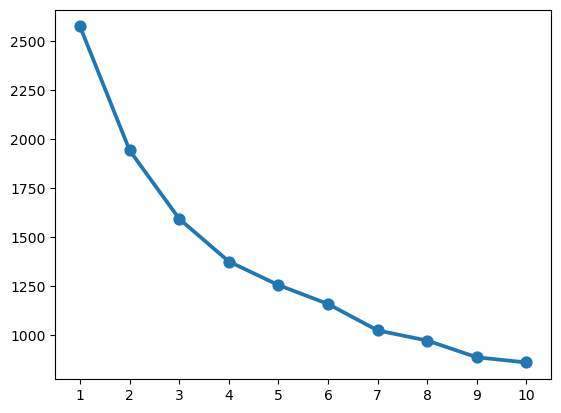

In [286]:
a=[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(x=a,y=wcss);

In [287]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [288]:
km=KMeans(3,random_state=1)
kmeans=km.fit(scaled_df)
labels=kmeans.labels_

In [289]:
silhouette_score(scaled_df,labels)

0.21929418846859633

In [290]:
# stihouette score will range between 0 to +-1
# if score >0, having +ve value the cluster formed are good 
# if score=0,data exhibits no clustering tendency
# if score >0,the clusters are wrangly grouped.

In [335]:
km=KMeans(4,random_state=1)
kmeans=km.fit(scaled_df)
labels=kmeans.labels_

In [337]:
silhouette_score(scaled_df,labels)

0.22428741308992245

In [339]:
# silhouette width or silhoutte
df['sil_width']=silhouette_samples(scaled_df,labels)

In [341]:
df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,sil_width,kmeans_clusters
0,1.0,227.0,147.0,111.0,2460.0,639.0,0.216895,1
1,2.0,123.0,86.0,65.0,3510.0,436.0,0.221096,2
2,3.0,306.0,149.0,76.0,2570.0,669.0,0.093584,1
3,4.0,251.0,112.0,129.0,3650.0,623.0,0.107605,0
4,5.0,174.0,135.0,128.0,3400.0,579.0,0.197195,0


In [364]:
df['sil_width'].mean()

0.22428741308992245

In [345]:
# cluster.profiling

In [347]:
df['kmeans_clusters']=labels

In [349]:
df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,sil_width,kmeans_clusters
0,1.0,227.0,147.0,111.0,2460.0,639.0,0.216895,1
1,2.0,123.0,86.0,65.0,3510.0,436.0,0.221096,2
2,3.0,306.0,149.0,76.0,2570.0,669.0,0.093584,1
3,4.0,251.0,112.0,129.0,3650.0,623.0,0.107605,0
4,5.0,174.0,135.0,128.0,3400.0,579.0,0.197195,2


In [351]:

df['kmeans_clusters'].value_counts()

kmeans_clusters
1    141
0    137
3    134
2    103
Name: count, dtype: int64

In [354]:
clust_profile=df.groupby('kmeans_clusters').mean()
clust_profile['freq']=df['kmeans_clusters'].value_counts().sort_index()

In [356]:
clust_profile

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,sil_width,freq
kmeans_clusters,,,,,,,,
0,269.664234,291.554745,103.299270,73.364964,3117.810219,600.605839,0.280380,137
1,259.326241,272.333333,193.865248,91.453901,2645.975177,691.202128,0.191330,141
2,256.087379,166.106796,100.553398,99.106796,3010.582524,501.912621,0.185722,103
3,246.149254,180.291045,192.261194,66.238806,3001.044776,573.440299,0.231261,134


In [366]:
df[df['sil_width']<0]

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,sil_width,kmeans_clusters
7,8.0,256.0,165.0,46.0,2930.0,621.0,-0.003879,3
12,13.0,227.0,233.0,73.0,3020.0,667.0,-0.052956,1
13,14.0,249.0,58.0,138.0,3550.0,586.0,-0.013868,2
24,25.0,350.0,10.0,155.0,3200.0,429.0,-0.007997,2
83,84.0,230.0,63.0,96.0,3620.0,528.0,-0.025549,2
99,100.0,194.0,199.0,123.0,3110.0,624.0,-0.036507,1
135,136.0,153.0,164.0,115.0,2590.0,589.0,-0.017172,2
161,162.0,199.0,166.0,74.0,1750.0,563.0,-0.017280,1
170,171.0,242.0,64.0,109.0,2930.0,563.0,-0.050599,2
192,193.0,239.0,132.0,36.0,3120.0,522.0,-0.022839,3


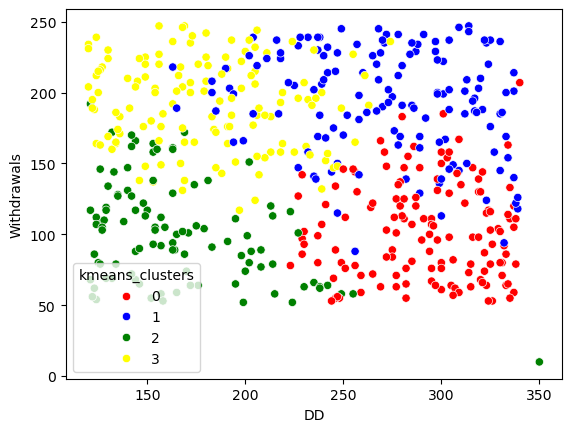

In [386]:
color=['red','blue','green','yellow']
sns.scatterplot(x='DD',y='Withdrawals',data=df,hue='kmeans_clusters',palette=color);